<a href="https://colab.research.google.com/github/phylypo/TimeSeriesPrediction/blob/main/Time_Series_DL_TCN_LSTNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Time Series Forecasting from Statistical to Recent ML Approaches 

Topics for this notebook in bold:
- Introduction to TS
- Decompose (*Time_Series_FFT.ipynb*)
 - Gen Synthic
 - Decompose FFT
- Naive approaches
- Statistical (*Time_Series_ES_ARIMA.ipynb*)
 - Smoothing techniques
 - ARIMA
 - State Space (*Time_Series_StateSpace.ipynb*)
- ML (*Time_Series_ML-LR_XGBoost.ipynb*)
  - Linear Regression
  - Decision Tree (XGBoost)
- DL (*Time_Series_DL_LSTM_CNN.ipynb*)
 - LSTM, CNN + LSTM
 - **TCN (*Time_Series_DL_TCN_LSTNet.ipynb*)**
 - **LSTNet**
 - TFT (*Time_Series_DL_TFT_N-BEATS.ipynb*)
 - N-BEATS
- Commercial: (*Time_Series_Commercial.ipynb*)
 - Facebook Prophet
 - Amazon DeepAR

## Deep Learning


**Convolutional Neural Network (CNN)**

1. Causual Convolution

> $h_t^{l+1} = A(\sum\limits_{\tau=0}^k{W(l,\tau)h_{t-\tau}^l})$
- $h_t^l$ : hidden state at layer $l$ at time $t$
- $W(l,\tau)$: filter weight at layer $l$
- $A$: activation function like sigmoid or relu

2. Dilated Convolution: Dilated convolutions can hence
be interpreted as convolutions of a down-sampled version of the lower layer features – reducing
resolution to incorporate information from the distant past. As such, by increasing the dilation rate
with each layer, dilated convolutions can gradually aggregate information at different time blocks,
allowing for more history to be used in an efficient manner.

> $h_t^{l+1} = A(\sum\limits_{\tau=0}^{\lfloor{k/d_l}\rfloor}{W(l,\tau)h_{t-\tau}^l})$
- $d_l$ dilation rate on specific layer

**Recurrent Neural Network (RNN)**

RNN used as sequence modeling for NLP. It has internal state that summarize the past information and get recursivel udpate with new data at each time step.

- use in sequence modeling  in NLP
- add memory cell in LSTM

> $y_{t+1} = \gamma_y(W_y x_t + b_y)$
> $z_t = \gamma_z ( W_{z_1} z_{t-1} + W_{z_2}y_t + W_{z_3} x_t + W_{z_4}s + b_z )$
- $z_t$: hidden state at time $t$
- $W, b$: linear weigths and biases
- $\gamma$: activation function

**Long Short-Term Memory (LSTM)**

> $z_t = o_t \odot \tanh(c_t)$
- $o_t$: output gate,
- $c_t$: cell state that includes $z_t$

**Attention Mechanisms**

Improvement in long term dependcency learning in NLP. It aggregates temporal features using dynamically genterated weights allow the network to focus on significat time steps in the past in ven far back look back window. Using key-value lookup for a query $q$:

> $h_t = \sum\limits_{\tau=0}^k{\alpha(k_t, q_\tau)v_{t-\tau}}$

> - $k_t$: key
> - $q_\tau$: query
> - $v_{t-\tau}$: intermediate features produced at different time steps
> - $\alpha(k_t,q_\tau)$ : attention weight at time $t$

![](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/02d49b4dbaf8c093034918a76648fea53961753d/2-Figure1-1.png)
Figure 1: Incorporating temporal information using different encoder architectures. <br/>

*("Time Series Forecasting With Deep Learning: A Survey",
Bryan Lim, Stefan)*



### TCN


Temporal Convolutional Networks, or simply TCN, is a variation of Convolutional Neural Networks for sequence modelling tasks, by combining aspects of RNN and CNN architectures. 

This model performance a multi-horizon prediction.


TCN is based upon two principles:
- the fact that the network produces an output of the same
length as the input, and 
- the fact that there can be no leakage
from the future into the past. To accomplish the first point,
the TCN uses a 1D fully-convolutional network (FCN) architecture.

![tcn](https://images4.pianshen.com/786/83/83d5f6e1a25df286f5ebec9f977b4912.png)

![result](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/921196c32213a229245a9705ee4768bc941e7a26/6-Table1-1.png)

TCN implementations for different ML libraries can be found here: 

- Pytorch: http://github.com/locuslab/TCN
- Keras: https://github.com/philipperemy/keras-tcn
- Tensorflow: https://github.com/Baichenjia/Tensorflow-TCN

Ref:
- "An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling", Shaojie Bai, J. Zico Kolter, Vladlen Koltun (https://arxiv.org/abs/1803.01271)
- https://towardsdatascience.com/farewell-rnns-welcome-tcns-dd76674707c8
- https://dida.do/blog/temporal-convolutional-networks-for-sequence-modeling





**KDTCN (Knowledge Driven TCN)**

Knowledge-Driven Stock Trend Prediction and Explanation via
Temporal Convolutional Network

![](https://miro.medium.com/max/500/1*av3j_IHrU1ACgDBq2NLstA.png)

Ref:
- https://core.ac.uk/download/pdf/222446995.pdf


In [ ]:
!pip install keras-tcn

     |████████████████████████████████| 378kB 4.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

from tcn import TCN, tcn_full_summary

batch_size, timesteps, input_dim = None, 20, 1


def get_x_y(size=1000):
    import numpy as np
    pos_indices = np.random.choice(size, size=int(size // 2), replace=False)
    x_train = np.zeros(shape=(size, timesteps, 1))
    y_train = np.zeros(shape=(size, 1))
    x_train[pos_indices, 0] = 1.0
    y_train[pos_indices, 0] = 1.0
    return x_train, y_train


i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(1)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='mse')

tcn_full_summary(m, expand_residual_blocks=False)

x, y = get_x_y()
m.fit(x, y, epochs=10, validation_split=0.2)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 1)]           0         
_________________________________________________________________
residual_block_0 (ResidualBl [(None, 20, 64), (None, 2 8576      
_________________________________________________________________
residual_block_1 (ResidualBl [(None, 20, 64), (None, 2 16512     
_________________________________________________________________
residual_block_2 (ResidualBl [(None, 20, 64), (None, 2 16512     
_________________________________________________________________
residual_block_3 (ResidualBl [(None, 20, 64), (None, 2 16512     
_________________________________________________________________
residual_block_4 (ResidualBl [(None, 20, 64), (None, 2 16512     
_________________________________________________________________
residual_block_5 (ResidualBl [(None, 20, 64), (None, 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tcn import TCN

d = pd.read_csv('AirPassengers.csv', index_col=0, parse_dates=True)

lookback_window = 12  # months.

d = d.values  # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(d)):
    x.append(d[i - lookback_window:i])
    y.append(d[i])
x = np.array(x)
y = np.array(y)

x_train = x[0:-12]
y_train = y[0:-12]
x_test = x[-12:]
y_test = y[-12:]
print(x.shape)
print(y.shape)

i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])

model.summary()

model.compile('adam', 'mae')

print('Train...')
model.fit(x_train, y_train, epochs=150, verbose=0)
print('done', model.losses)

(132, 12, 1)
(132, 1)
Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 12, 1)]           0         
_________________________________________________________________
tcn_12 (TCN)                 (None, 64)                91136     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________
Train...
done []


MAE: 15.013376871744791


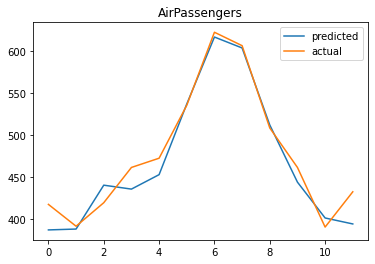

In [ ]:
p = model.predict(x_test)
mae = abs(p-y_test).mean()
print("MAE:",mae) #MAE: 15.013376871744791
plt.plot(p)
plt.plot(y_test)
plt.title('AirPassengers')
plt.legend(['predicted', 'actual'])
plt.show()

### LSTNet
Long- and Short-Term Temporal Network ([LSTNet](https://arxiv.org/pdf/1703.07015.pdf))



Multivariate time series forecasting often faces a major research
challenge, that is, how to capture and leverage the dynamics dependencies among multiple variables.

Short coming of classical ARIMA:
- ARIMA models are adaptive to various
exponential smoothing techniques and flexible enough to
subsume other types of time series models. However, ARIMA models, are rarely used in
high dimensional multivariate time series forecasting.
- vector autoregression (VAR) is arguably the
most widely used models in multivariate time series due
to its simplicity. The model capacity of VAR grows
linearly over the temporal window size and quadratically over the number of variables. 

![LSTNet](https://raw.githubusercontent.com/opringle/multivariate_time_series_forecasting/master/docs/model_architecture.png)

LSTNet Components:
 1. CNN with k-th filter with RELU
 2. RNN (GRU) - with RELU
 3. RNN Skip Connection
 4. Temporal Attention Layer
 5. Autogression with highway

Ref:
- https://modelzoo.co/model/lstnet
- https://opringle.github.io/2018/01/05/deep_learning_multivariate_ts.html
- "Modeling Long- and Short-Term Temporal Patterns with Deep Neural Networks", Lai et al., SIGIR 2018
(https://arxiv.org/pdf/1703.07015.pdf )
Code: https://github.com/laiguokun/LSTNet


In [ ]:
# get exchange rate data -- not using
!wget -O exchange_rate.txt.gz https://github.com/laiguokun/multivariate-time-series-data/blob/master/exchange_rate/exchange_rate.txt.gz?raw=true
!gunzip -f exchange_rate.txt.gz

--2020-10-29 00:18:01--  https://github.com/laiguokun/multivariate-time-series-data/blob/master/exchange_rate/exchange_rate.txt.gz?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/laiguokun/multivariate-time-series-data/raw/master/exchange_rate/exchange_rate.txt.gz [following]
--2020-10-29 00:18:01--  https://github.com/laiguokun/multivariate-time-series-data/raw/master/exchange_rate/exchange_rate.txt.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/laiguokun/multivariate-time-series-data/master/exchange_rate/exchange_rate.txt.gz [following]
--2020-10-29 00:18:01--  https://raw.githubusercontent.com/laiguokun/multivariate-time-series-data/master/exchange_rate/exchange_rate.txt.gz
Resolving raw.githubusercontent.com (raw.githubuserconten

In [ ]:
!head exchange_rate.txt

112,112
118,118
132,132
129,129
121,121
135,135
148,148
148,148
136,136
119,119


In [ ]:
# get airpassenger data instead
# download data file
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv
!cat AirPassengers.csv | grep -v 'Air' | awk -F',' '{print $2","$2}' > exchange_rate.txt

In [ ]:
# From: https://colab.research.google.com/github/shrey920/MultivariateTimeSeriesForecasting/blob/master/MultivariateTimeSeriesForecasting(colab_version).ipynb#scrollTo=Rspn1MTDZYCj
import torch
import torch.nn as nn
import torch.nn.functional as F
import argparse
import math
import time
import numpy as np;
import importlib

import torch.optim
from torch.autograd import Variable

In [ ]:
#@title model
class LSTNet(nn.Module):
    def __init__(self, args, data):
        super(LSTNet, self).__init__()
#         self.use_cuda = args.cuda
        self.P = args.window;
        self.m = data.m
        self.hidR = args.hidRNN;
        self.hidC = args.hidCNN;
        self.hidS = args.hidSkip;
        self.Ck = args.CNN_kernel;
        self.skip = args.skip;
        self.pt = (self.P - self.Ck)//self.skip
        self.hw = args.highway_window
        self.conv1 = nn.Conv2d(1, self.hidC, kernel_size = (self.Ck, self.m));
        self.GRU1 = nn.GRU(self.hidC, self.hidR);
        self.dropout = nn.Dropout(p = args.dropout);
        if (self.skip > 0):
            self.GRUskip = nn.GRU(self.hidC, self.hidS);
            self.linear1 = nn.Linear(self.hidR + self.skip * self.hidS, self.m);
        else:
            self.linear1 = nn.Linear(self.hidR, self.m);
        if (self.hw > 0):
            self.highway = nn.Linear(self.hw, 1);
        self.output = None;
        if (args.output_fun == 'sigmoid'):
            self.output = F.sigmoid;
        if (args.output_fun == 'tanh'):
            self.output = F.tanh;
 
    def forward(self, x):
        batch_size = x.size(0);
        
        #CNN
        c = x.view(-1, 1, self.P, self.m);
        c = F.relu(self.conv1(c));
        c = self.dropout(c);
        c = torch.squeeze(c, 3);
        
        # RNN 
        r = c.permute(2, 0, 1).contiguous();
        _, r = self.GRU1(r);
        r = self.dropout(torch.squeeze(r,0));

        
        #skip-rnn
        
        if (self.skip > 0):
            s = c[:,:, int(-self.pt * self.skip):].contiguous();
            s = s.view(batch_size, self.hidC, self.pt, self.skip);
            s = s.permute(2,0,3,1).contiguous();
            s = s.view(self.pt, batch_size * self.skip, self.hidC);
            _, s = self.GRUskip(s);
            s = s.view(batch_size, self.skip * self.hidS);
            s = self.dropout(s);
            r = torch.cat((r,s),1);
        
        res = self.linear1(r);
        
        #autoregressive
        if (self.hw > 0):
            z = x[:, -self.hw:, :];
            z = z.permute(0,2,1).contiguous().view(-1, self.hw);
            z = self.highway(z);
            z = z.view(-1,self.m);
            res = res + z;
            
        if (self.output):
            res = self.output(res);
        return res;

In [ ]:
#@title 
def normal_std(x):
    return x.std() * np.sqrt((len(x) - 1.)/(len(x)))

class Data_utility(object):
    # train and valid is the ratio of training set and validation set. test = 1 - train - valid
    def __init__(self, file_name, train, valid,  horizon, window, normalize = 2):
#         self.cuda = cuda;
        self.P = window
        self.h = horizon
        fin = open(file_name)
        self.rawdat = np.loadtxt(fin,delimiter=',')
        self.dat = np.zeros(self.rawdat.shape)
        self.n, self.m = self.dat.shape
        self.normalize = 2
        self.scale = np.ones(self.m)
        self._normalized(normalize)
        self._split(int(train * self.n), int((train+valid) * self.n), self.n)
        self.scale = torch.from_numpy(self.scale).float()
        tmp = self.test[1] * self.scale.expand(self.test[1].size(0), self.m)
            
#         if self.cuda:
#             self.scale = self.scale.cuda();
#         self.scale = Variable(self.scale);
        
        self.rse = normal_std(tmp)
        self.rae = torch.mean(torch.abs(tmp - torch.mean(tmp)))
    
    def _normalized(self, normalize):
        #normalized by the maximum value of entire matrix.
       
        if (normalize == 0):
            self.dat = self.rawdat
            
        if (normalize == 1):
            self.dat = self.rawdat / np.max(self.rawdat)
            
        #normlized by the maximum value of each row(sensor).
        if (normalize == 2):
            for i in range(self.m):
                self.scale[i] = np.max(np.abs(self.rawdat[:,i]))
                self.dat[:,i] = self.rawdat[:,i] / np.max(np.abs(self.rawdat[:,i]))
            
        
    def _split(self, train, valid, test):
        
        train_set = range(self.P+self.h-1, train)
        valid_set = range(train, valid)
        test_set = range(valid, self.n)
        self.train = self._batchify(train_set, self.h)
        self.valid = self._batchify(valid_set, self.h)
        self.test = self._batchify(test_set, self.h)
        
        
    def _batchify(self, idx_set, horizon):
        
        n = len(idx_set)
        X = torch.zeros((n,self.P,self.m))
        Y = torch.zeros((n,self.m))
        
        for i in range(n):
            end = idx_set[i] - self.h + 1
            start = end - self.P
            X[i,:,:] = torch.from_numpy(self.dat[start:end, :])
            Y[i,:] = torch.from_numpy(self.dat[idx_set[i], :])

        return [X, Y]

    def get_batches(self, inputs, targets, batch_size, shuffle=True):
        length = len(inputs)
        if shuffle:
            index = torch.randperm(length)
        else:
            index = torch.LongTensor(range(length))
        start_idx = 0
        while (start_idx < length):
            end_idx = min(length, start_idx + batch_size)
            excerpt = index[start_idx:end_idx]
            X = inputs[excerpt]; Y = targets[excerpt]
#             if (self.cuda):
#                 X = X.cuda()
#                 Y = Y.cuda()  
            yield Variable(X), Variable(Y)
            start_idx += batch_size

In [ ]:
#@title 
def evaluate2(data, X, Y, model, evaluateL2, evaluateL1, batch_size):
    model.eval()
    total_loss = 0
    total_loss_l1 = 0
    n_samples = 0
    predict = None
    test = None
    
    for X, Y in data.get_batches(X, Y, batch_size, False):
        output = model(X)
        if predict is None:
            predict = output
            test = Y
        else:
            predict = torch.cat((predict,output))
            test = torch.cat((test, Y))
        
        scale = data.scale.expand(output.size(0), data.m)
        total_loss += evaluateL2(output * scale, Y * scale).data
        total_loss_l1 += evaluateL1(output * scale, Y * scale).data
        n_samples += (output.size(0) * data.m)
    rse = math.sqrt(total_loss / n_samples)/data.rse
    rae = (total_loss_l1/n_samples)/data.rae
    
    predict = predict.data.cpu().numpy()
    Ytest = test.data.cpu().numpy()
    sigma_p = (predict).std(axis = 0)
    sigma_g = (Ytest).std(axis = 0)
    mean_p = predict.mean(axis = 0)
    mean_g = Ytest.mean(axis = 0)
    index = (sigma_g!=0)
    correlation = ((predict - mean_p) * (Ytest - mean_g)).mean(axis = 0)/(sigma_p * sigma_g)
    correlation = (correlation[index]).mean()
    return rse, rae, correlation, predict, Ytest

def evaluate(data, X, Y, model, evaluateL2, evaluateL1, batch_size):
    model.eval()
    total_loss = 0
    total_loss_l1 = 0
    n_samples = 0
    predict = None
    test = None
    
    for X, Y in data.get_batches(X, Y, batch_size, False):
        output = model(X)
        if predict is None:
            predict = output
            test = Y
        else:
            predict = torch.cat((predict,output))
            test = torch.cat((test, Y))
        
        scale = data.scale.expand(output.size(0), data.m)
        total_loss += evaluateL2(output * scale, Y * scale).data
        total_loss_l1 += evaluateL1(output * scale, Y * scale).data
        n_samples += (output.size(0) * data.m)
    rse = math.sqrt(total_loss / n_samples)/data.rse
    rae = (total_loss_l1/n_samples)/data.rae
    
    predict = predict.data.cpu().numpy()
    Ytest = test.data.cpu().numpy()
    sigma_p = (predict).std(axis = 0)
    sigma_g = (Ytest).std(axis = 0)
    mean_p = predict.mean(axis = 0)
    mean_g = Ytest.mean(axis = 0)
    index = (sigma_g!=0)
    correlation = ((predict - mean_p) * (Ytest - mean_g)).mean(axis = 0)/(sigma_p * sigma_g)
    correlation = (correlation[index]).mean()
    return rse, rae, correlation

def train(data, X, Y, model, criterion, batch_size):
    model.train()
    total_loss = 0
    n_samples = 0
    for X, Y in data.get_batches(X, Y, batch_size, True):
        model.zero_grad()
        output = model(X)
        scale = data.scale.expand(output.size(0), data.m)
        loss = criterion(output * scale, Y * scale)
        loss.backward()
        grad_norm = optim.step()
        total_loss += loss.data
        n_samples += (output.size(0) * data.m);
    return total_loss / n_samples

In [ ]:
#@title
class Arguments():
    def __init__(self,data,hidCNN=100,hidRNN=100,window=35,CNN_kernel=6,highway_window=24,clip=10,epochs=100,batch_size=128,dropout=0.2,save="save.pt",optim="adam",lr=0.001,horizon=12,skip=24,hidSkip=5,L1loss=True,normalize=2,output_fun="sigmoid"):
        self.data=data
        self.hidCNN=hidCNN
        self.hidRNN=hidRNN
        self.window=window
        self.CNN_kernel=CNN_kernel
        self.highway_window=highway_window
        self.clip=clip
        self.epochs=epochs
        self.batch_size=batch_size
        self.dropout=dropout
        self.optim=optim
        self.lr=lr
        self.skip=skip
        self.normalize=normalize
        self.horizon=horizon
        self.save=save
        self.output_fun=output_fun
        self.hidSkip=hidSkip
        self.L1Loss=L1loss

import torch.optim as optim

class Optim(object):

    def _makeOptimizer(self):
        if self.method == 'sgd':
            self.optimizer = optim.SGD(self.params, lr=self.lr)
        elif self.method == 'adagrad':
            self.optimizer = optim.Adagrad(self.params, lr=self.lr)
        elif self.method == 'adadelta':
            self.optimizer = optim.Adadelta(self.params, lr=self.lr)
        elif self.method == 'adam':
            self.optimizer = optim.Adam(self.params, lr=self.lr)
        else:
            raise RuntimeError("Invalid optim method: " + self.method)

    def __init__(self, params, method, lr, max_grad_norm, lr_decay=1, start_decay_at=None):
        self.params = list(params)  # careful: params may be a generator
        self.last_ppl = None
        self.lr = lr
        self.max_grad_norm = max_grad_norm
        self.method = method
        self.lr_decay = lr_decay
        self.start_decay_at = start_decay_at
        self.start_decay = False

        self._makeOptimizer()

    def step(self):
        # Compute gradients norm.
        # Objective Function
        grad_norm = 0
        for param in self.params:
            grad_norm += math.pow(param.grad.data.norm(), 2)

        grad_norm = math.sqrt(grad_norm)
        if grad_norm > 0:
            shrinkage = self.max_grad_norm / grad_norm
        else:
            shrinkage = 1.

        for param in self.params:
            if shrinkage < 1:
                param.grad.data.mul_(shrinkage)

        self.optimizer.step()
        return grad_norm


In [ ]:
#@title
#args=Arguments(horizon=24,hidCNN=50, hidRNN=50,L1loss=False,data="exchange_rate.txt",save="exchange_rate.pt",output_fun=None)
args=Arguments(horizon=12,hidCNN=30, hidRNN=30,L1loss=False,data="exchange_rate.txt",save="exchange_rate.pt",output_fun=None, 
               normalize=0,epochs=700)
print("args normlaize:", args.normalize)
Data = Data_utility(args.data, 0.8, 0.1, args.horizon, args.window, args.normalize);
print(Data.rse)


model = LSTNet(args, Data)
nParams = sum([p.nelement() for p in model.parameters()])
print('* number of parameters: %d' % nParams)

if args.L1Loss:
    criterion = nn.L1Loss(size_average=False);
else:
    criterion = nn.MSELoss(size_average=False);
evaluateL2 = nn.MSELoss(size_average=False);
evaluateL1 = nn.L1Loss(size_average=False)

best_val = 100; #1000000;

optim = Optim(
    model.parameters(), args.optim, args.lr, args.clip,
)

args normlaize: 0
tensor(73.9847)
* number of parameters: 6852


In [ ]:
#@title train

try:
    print('begin training');
    for epoch in range(1, args.epochs+1):
        epoch_start_time = time.time()
        train_loss = train(Data, Data.train[0], Data.train[1], model, criterion, args.batch_size)
        val_loss, val_rae, val_corr = evaluate(Data, Data.valid[0], Data.valid[1], model, evaluateL2, evaluateL1, args.batch_size);
        print('| end of epoch {:3d} | time: {:5.2f}s | train_loss {:5.4f} | valid rse {:5.4f} | valid rae {:5.4f} | valid corr  {:5.4f}'.format(epoch, (time.time() - epoch_start_time), train_loss, val_loss, val_rae, val_corr))
        # Save the model if the validation loss is the best we've seen so far.

        if val_loss < best_val:
            with open(args.save, 'wb') as f:
                torch.save(model, f)
            best_val = val_loss
        if epoch % 5 == 0:
            test_acc, test_rae, test_corr  = evaluate(Data, Data.test[0], Data.test[1], model, evaluateL2, evaluateL1, args.batch_size);
            print ("test rse {:5.4f} | test rae {:5.4f} | test corr {:5.4f}".format(test_acc, test_rae, test_corr))

except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')

# Load the best saved model.
with open(args.save, 'rb') as f:
    model = torch.load(f)
test_rse, test_rae, test_corr  = evaluate(Data, Data.test[0], Data.test[1], model, evaluateL2, evaluateL1, args.batch_size);

print("\n\n\n After end of training.")
print ("test rse {:5.4f} | test rae {:5.4f} | test corr {:5.4f}".format(test_rse, test_rae, test_corr))


begin training
| end of epoch   1 | time:  0.03s | train_loss 59594.7461 | valid rse 4.5059 | valid rae 5.3506 | valid corr  -0.2706
| end of epoch   2 | time:  0.02s | train_loss 56847.3242 | valid rse 4.3942 | valid rae 5.2083 | valid corr  -0.2666
| end of epoch   3 | time:  0.02s | train_loss 54217.4688 | valid rse 4.2827 | valid rae 5.0660 | valid corr  -0.2626
| end of epoch   4 | time:  0.02s | train_loss 51604.1016 | valid rse 4.1712 | valid rae 4.9234 | valid corr  -0.2579
| end of epoch   5 | time:  0.02s | train_loss 49071.1836 | valid rse 4.0603 | valid rae 4.7815 | valid corr  -0.2522
test rse 4.5029 | test rae 5.3617 | test corr -0.0991
| end of epoch   6 | time:  0.03s | train_loss 46651.3320 | valid rse 3.9498 | valid rae 4.6395 | valid corr  -0.2479
| end of epoch   7 | time:  0.02s | train_loss 44279.4805 | valid rse 3.8397 | valid rae 4.4974 | valid corr  -0.2453
| end of epoch   8 | time:  0.03s | train_loss 41932.8516 | valid rse 3.7299 | valid rae 4.3555 | valid c

In [ ]:
#Results of exchange rate
args=Arguments(horizon=12,hidCNN=30, hidRNN=30,L1loss=False,data="exchange_rate.txt",save="exchange_rate.pt",output_fun=None, normalize=0)
Data = Data_utility(args.data, 0.8, 0.1, args.horizon, args.window, args.normalize);

with open(args.save, 'rb') as f:
    model = torch.load(f)
test_acc, test_rae, test_corr, predict, Ytest  = evaluate2(Data, Data.test[0], Data.test[1], model, evaluateL2, evaluateL1, args.batch_size);

print("Results of exchange rate.")
print ("test rse {:5.4f} | test rae {:5.4f} | test corr {:5.4f}".format(test_acc, test_rae, test_corr))

Results of exchange rate.
test rse 0.2390 | test rae 0.2324 | test corr 0.9816


In [ ]:
print("predict:", predict[:,0])
print("ytest  :", Ytest[:,0])

predict: [406.171   363.4627  393.1544  400.29834 385.4922  432.55408 424.80777
 458.7914  545.94696 629.8142  638.3958  539.78723 454.40952 406.30453
 427.7132 ]
ytest  : [407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606. 508. 461. 390.
 432.]


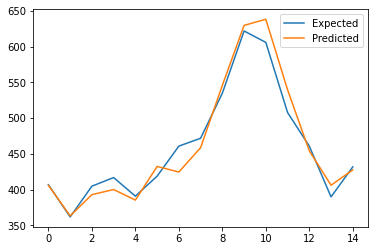

MAE: 13.961849


In [ ]:
from matplotlib import pyplot
pyplot.plot(Ytest[:,0], label='Expected')
pyplot.plot(predict[:,0], label='Predicted')
#pyplot.plot(Data.dat[:,0], label='orig train')
pyplot.legend()
pyplot.show()
mae = abs(Ytest[:,0] - predict[:,0]).mean()
print("MAE:", mae)

## Summary

In deep learning, the sequence to sequence approach like RNN and LSTM does shows some promise. The general aproaches is not meant for time series thus required a lot of tuning.

With the modern technique like TCN and LSTNet, these approach are build for time series. These techniques show great results out performance previous approaches. It even works well on our small dataset AirPassengers.

Next we will see more a few other modern approaches that resulted in the state of the art preformances.
